In [ ]:
import pandas as pd
path = 'sesvsuc.xlsm'
df = pd.read_excel(path)

In [ ]:
df.head()

,Unnamed: 0,Number (in thousands),Unnamed: 2,Unnamed: 3,Percentage distribution,Unnamed: 5,Unnamed: 6,All levels,Unnamed: 8,Less than high school completion,Unnamed: 10,Unnamed: 11,High school completion,Unnamed: 13,Unnamed: 14,Some post- secondary education (no credential),Unnamed: 16,Unnamed: 17,Postsecondary certificate,Unnamed: 19,Unnamed: 20,Associate's degree,Unnamed: 22,Unnamed: 23,Bachelor's or higher degree,Unnamed: 25,Unnamed: 26
0,"Total, all SES\2\ groups ...................",3241.6,,48.9785,100,NaN,(†),100.0,(†),3.16241,,0.230778,13.3664,,0.465422,31.0918,,0.526816,8.20269,,0.314218,8.3969,,0.312776,35.7799,,0.785913
1,Low SES\2\ .................................,809.807,,24.4285,100,NaN,(†),100.0,(†),7.77607,,0.6145,22.5578,,0.918877,35.5459,,1.07439,10.7527,,0.678083,8.13258,,0.59246,15.235,,0.897108
2,Male ..........................................,369.922,,12.9259,45.6803,,0.93645,100.0,(†),10.4388,,1.0773,27.6715,,1.48546,34.8045,,1.56836,7.37062,,0.830859,7.26522,,0.90896,12.4494,,1.11431
3,Female ........................................,439.885,,15.7574,54.3197,,0.93645,100.0,(†),5.53686,,0.640213,18.2575,,1.11268,36.1694,,1.44765,13.5968,,0.951076,8.86198,,0.774455,17.5775,,1.21318
4,White .........................................,311.103,,15.0796,38.4169,,1.52899,100.0,(†),5.46438,,0.769873,27.3577,,1.50981,31.4455,,1.68476,10.9823,,1.24155,9.0715,,0.959586,15.6786,,1.34475


In [ ]:
for i in range(1,len(df.columns)+1):
    n = ('Unnamed: ' + str(i))
    if(n in df.columns):
        df.drop([n], axis=1, inplace=True)

In [ ]:
import re

In [ ]:
m = False
for i, s in enumerate(df['Unnamed: 0']):
    name = s.strip(' .').strip()
    name = re.sub('\\\\[0-9]\\\\', '', name)
    name = re.sub('\([a-z]+\)', '', name)
    name = name.strip()
    nums = ['First', 'Second', 'Third', 'Fourth']
    if(name in nums):
        name = ('Math_Q' if m else 'Reading_Q') + str(nums.index(name)+1)
    if(re.match('[a-zA-Z]+_Q4', name)):
        m = not m
    if(name.find('SES')!=-1):
        name = 'Total'
    df.rename(index={i: name}, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.replace('[!‡†]', 'NaN', inplace=True, regex=True)

In [ ]:
df = df.astype('float64')

In [ ]:
rowspses = int((len(df.index)-1)/3)
dftotal = df.iloc[:1]
dfgroups = {}
dflist = []
sesnames = ['Low', 'Middle', 'High']
subjectnames = ['R', 'M']
for i in range(3):
    dflist.append(df.iloc[(1+i*rowspses):(1+(i+1)*rowspses)])
    dfgroups[sesnames[i]] = dflist[i]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dflist[0].transpose()

,Total,Male,Female,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races,Reading_Q1,Reading_Q2,Reading_Q3,Reading_Q4,Math_Q1,Math_Q2,Math_Q3,Math_Q4
Number (in thousands),809.806938,369.922319,439.884619,311.102679,162.410437,250.516200,37.906416,NaN,11.384498,35.124374,323.795079,245.604926,140.473574,87.705520,320.325066,239.499795,159.935197,77.819041
Percentage distribution,100.000000,45.680310,54.319690,38.416895,20.055451,30.935299,4.680920,0.168229,1.405829,4.337376,40.597237,30.793802,17.612494,10.996467,40.162169,30.028344,20.052581,9.756906
All levels,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Less than high school completion,7.776066,10.438766,5.536860,5.464385,9.265019,10.144080,4.584017,NaN,NaN,7.079868,12.029305,6.434598,3.639887,NaN,11.932972,6.846426,3.636005,NaN
High school completion,22.557830,27.671451,18.257514,27.357748,19.080268,19.146053,12.818607,NaN,NaN,34.398030,28.271813,21.573038,16.465385,12.080386,29.410617,19.130908,17.685698,12.770835
Some post- secondary education (no credential),35.545892,34.804493,36.169373,31.445477,40.206837,39.365280,29.158856,NaN,36.709960,29.820752,34.855567,37.593285,39.108345,29.861583,35.286757,39.153956,37.543895,25.015527
Postsecondary certificate,10.752668,7.370620,13.596812,10.982251,11.966341,9.740280,9.234978,NaN,NaN,8.736931,9.951546,13.777423,9.313887,6.347336,11.552194,11.628751,8.302846,8.451118
Associate's degree,8.132578,7.265224,8.861981,9.071497,5.670444,8.979804,7.584573,NaN,NaN,7.007953,7.767288,6.928614,10.135980,9.634365,6.267749,9.824097,8.057727,10.745896
Bachelor's or higher degree,15.234967,12.449445,17.577459,15.678642,13.811092,12.624504,36.618969,NaN,NaN,12.956467,7.124481,13.693043,21.336516,40.566438,5.549711,13.415862,24.773829,42.046945


In [ ]:
idx2name = list(dflist[0].transpose().index)
name2idx = {idx2name[i]:i for i in range(len(idx2name))}

{'Number (in thousands)': 0,
 'Percentage distribution': 1,
 'All levels': 2,
 'Less than high school completion': 3,
 'High school completion': 4,
 'Some post- secondary education (no credential)': 5,
 'Postsecondary certificate': 6,
 "Associate's degree": 7,
 "Bachelor's or higher degree": 8}

In [ ]:
import matplotlib.colors as mcolors
colors = list(mcolors.BASE_COLORS.values())

In [ ]:
def spread(xmin, xmax, yvals, ax, color):
    x = np.linspace(xmin, xmax, len(yvals)+1)
    diff = x[1]-x[0]
    x = x[:-1]+diff/2
    ax.bar(x, yvals, diff, color=color)

def plotby(indicator_index, indicator_name):
    groups = np.array([(np.array(i.transpose().iloc[indicator_index]['Reading_Q1':'Math_Q4'])) for i in dflist])
    fig, ax = plt.subplots()
    groups = groups.reshape([6,4])
    width = 0.35
    color = []
    for i, ses in enumerate(groups):
        if(not i%2):
            color = np.random.random(3)/2
        spread(i-width, i+width, ses, ax, color)
    ax.set_xticks([i for i in range(len(groups))])
    sesnames = ['Low', 'Middle', 'High']
    subjectnames = ['R', 'M']
    ax.set_xticklabels([str(sesnames[int(i/2)]+' '+subjectnames[i%2]) for i in range(len(groups))])
    plt.title(indicator_name.title() + ' Grouped by SES vs Math and Reading Scores')

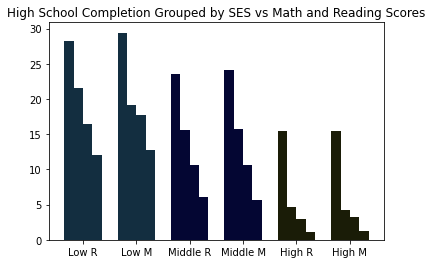

In [ ]:
indicator_name = 'High school completion'
plotby(name2idx[indicator_name], indicator_name)